## Exercise 1

A common approximation problem consists in fitting a series of measurements using a specific class of functions. For instance, one can look for the best linear interpolator or the best polynomial interpolator. A popular class of interpolators is the class of rational functions, i.e. functions which are the ratio of two polynomials. For instance, this is the case in control engineering, where the measurements are sampled values of the transfer function, called "moments", and we aim at obtaining the best transfer function that matches the sampled moments. Of course, transfer functions are rational functions.

Consider the following **quasiconvex** optimisation problem:
$$
\begin{array}{ll}
\min & \displaystyle \max_{i=1,\dots,k} \left| \frac{p(t_i)}{q(t_i)}-y_i\right| 
\end{array} \tag{1}
$$
with
$$
p(t) = a_0 + a_1 t + a_2 t^2 + \cdots + a_m t^m, \qquad q(t) = 1 + b_1t + \cdots + b_n t^n,
$$
where the domain of the objective function is
$$
D = \{(a,b)\in \mathbb{R}^{m+1}\times \mathbb{R}^n : q(t) > 0, \,\,\alpha \le t \le \beta \}.
$$
In this problem we fit a rational function $p(t)/q(t)$ to given data $y$, while constraining the polynomial denominator to be positive in the interval $[\alpha,\beta]$. The optimisation variables are the numerator and denominator coefficients $a_i$ and $b_i$.

Here, we consider the specific problem instance with data

$$
t_i = -3 + 6\frac{i-1}{k-1}, \quad y_i = e^{t_i}, \quad i=1,\dots,k, \tag{2}
$$

where $k=201$. In other words, the data are obtained by uniformly sampling the exponential function over the interval $[-3,3]$. 

For this exercise you will find useful Sub-Section "*Representation via a family of convex functions*" in 4.3.1 and
Sub-Section "*Special case: Quasiconvex Optimisation*" in 5.1.1.

*    Transform problem $(1)$ into a convex feasibility problem. (*NB: you do not have to prove that the convex representation is convex. The proof is postponed to Exercise $2$*).
*    Solve problem $(1)$ for $m=2$ and $n=2$, with a bisection tolerance of $0.001$ (as upper bound you can pick $e^3$). 
*    Plot, in the same figure, the exponential in $(2)$ with a solid line and the rational approximation obtained with the optimal $a_0$, $a_1$, $a_2$, $b_1$ and $b_2$ with a dashed line.

In [ ]:
import numpy as np
import cvxpy as cp

In [ ]:
m = 2
n = 2
tolerance = 0.001

p = lambda x,a0,a1: 1 + a0*x + a1*x**2
q = lambda x,b0,b1: 1 + b0*x + b1*x**2

phi = lambda y,t,x: np.abs(p(x) - y * q(x)) - t*q(x)

In [ ]:

k = 201
tp = np.zeros((k,3))
tq = np.zeros((k,2))
for i in range(1,k+1):
  tp[i-1][0] = 1
  tp[i-1][1] = -3 + 6*(i-1)/(k-1)
  tp[i-1][2] = tp[i-1][1]**2
  tq[i-1][0] = tp[i-1][1] 
  tq[i-1][1] = tp[i-1][2]

y = np.exp(tp[:,1])

print("tp:",tp.shape)
print("tq:",tq.shape)
print("y:",y.shape)

tp: (201, 3)
tq: (201, 2)
y: (201,)


In [ ]:
p = cp.Variable((1,3))
q = cp.Variable((1,2))

a = cp.Variable((1,3))
b = cp.Variable((1,2))


print(q.shape)

constraints = [ cp.abs(p@tp.T  - y.T@(q@tq.T).T) - q@tq.T <= 0,
               q@tq.T >=0,
]

obj = cp.Minimize(0)

prob = cp.Problem(obj,constraints)

# 1,22,

(1, 2)


In [ ]:
prob.solve()
prob.status

'optimal'

In [ ]:
l = 0
u = np.exp(3)

while(u-l>tolerance):
  



SyntaxError: ignored

(2,)

In [ ]:
# Transform to convex feasiblity problem



array([ 0.  , -3.  , -2.97, -2.94, -2.91, -2.88, -2.85, -2.82, -2.79,
       -2.76, -2.73, -2.7 , -2.67, -2.64, -2.61, -2.58, -2.55, -2.52,
       -2.49, -2.46, -2.43, -2.4 , -2.37, -2.34, -2.31, -2.28, -2.25,
       -2.22, -2.19, -2.16, -2.13, -2.1 , -2.07, -2.04, -2.01, -1.98,
       -1.95, -1.92, -1.89, -1.86, -1.83, -1.8 , -1.77, -1.74, -1.71,
       -1.68, -1.65, -1.62, -1.59, -1.56, -1.53, -1.5 , -1.47, -1.44,
       -1.41, -1.38, -1.35, -1.32, -1.29, -1.26, -1.23, -1.2 , -1.17,
       -1.14, -1.11, -1.08, -1.05, -1.02, -0.99, -0.96, -0.93, -0.9 ,
       -0.87, -0.84, -0.81, -0.78, -0.75, -0.72, -0.69, -0.66, -0.63,
       -0.6 , -0.57, -0.54, -0.51, -0.48, -0.45, -0.42, -0.39, -0.36,
       -0.33, -0.3 , -0.27, -0.24, -0.21, -0.18, -0.15, -0.12, -0.09,
       -0.06, -0.03,  0.  ,  0.03,  0.06,  0.09,  0.12,  0.15,  0.18,
        0.21,  0.24,  0.27,  0.3 ,  0.33,  0.36,  0.39,  0.42,  0.45,
        0.48,  0.51,  0.54,  0.57,  0.6 ,  0.63,  0.66,  0.69,  0.72,
        0.75,  0.78,

### Solution Exercise 1

The problem can be solved by transforming it into a feasibility problem, namely

$$
\begin{array}{lll}
\min & 0 & \\
\text{s.t.} & | p(t_i) - y_i q(t_i)| \le \gamma q(t_i) & i=1,\dots,k  
\end{array} \tag{1}
$$

which is solved in the following code. (The proof of the convexity of the problem above is postponed to Exercise $2$.)

In [ ]:
# Include some libraries
import cvxpy as cp
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# Generate the points for the interpolation
k = 201
t = np.zeros(k)
y = np.zeros(k)

for i in range(k):
  t[i] = -3 + 6*(i)/(k-1)
  y[i] = math.exp(t[i])

In [ ]:
# Declare the variables
a = cp.Variable(3)
b = cp.Variable(2)

# Construct the array [1  b_0  b_1]
bt=np.array([1,0,0])+np.array([0,1,0])*b[0]+np.array([0,0,1])*b[1]

# Construct the matrix where the row i is [1 t_i t_i^2]
Tmatrix = np.array([np.ones(k), t, t*t])

In [ ]:
# Tolerance, upper and lower bound for the bisection
u = math.exp(3)
l = 0
tol = 0.001

# Bisection algorithm
while u-l >= tol:
  gamma = (l+u)/2
  # Formulation and soluton of the feasibility problem
  pt = a@Tmatrix
  qt = bt@Tmatrix
  constr = [cp.abs(pt - cp.multiply(y,qt)) <= gamma*qt]
  prob = cp.Problem(cp.Minimize(0),constr)
  prob.solve()

  if prob.status == 'optimal':
    u=gamma
    a_opt=a.value
    b_opt=b.value
    objval_opt=gamma
  else:
    l=gamma

In [ ]:
print("The optimal a_i are",a_opt)
print("The optimal b_i are",b_opt)
print("The optimal objective value is",objval_opt)

The optimal a_i are [1.00971251 0.61197358 0.11353697]
The optimal b_i are [-0.41454048  0.04848698]
The optimal objective value is 0.02329255380496617


In [ ]:
# Computation of the optimal interpolant
bt_opt=np.array([1,0,0])+np.array([0,1,0])*b_opt[0]+np.array([0,0,1])*b_opt[1]
y_fit=a_opt@Tmatrix/(bt_opt@Tmatrix)

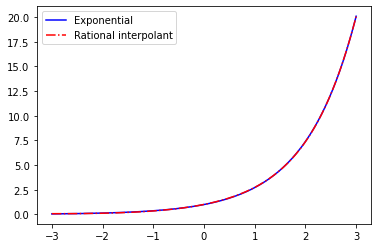

In [ ]:
# Plot of the interpolant and of the real function
plt.plot(t, y,'-b',label="Exponential")
plt.plot(t, y_fit,'-.r',label="Rational interpolant")
plt.legend()
plt.show()

# Exercise : IMPORTANT: read this

It turns out that CVXPY usually is not able to solve quasiconvex optimisation problems in the way you have just done, because CVXPY does not always recognise the transformed feasibility problem as convex (i.e. even if you prove its sublevel sets are convex, CVXPY may not know this and thinks that the problem is not convex). 

The reason the problem that you have just solved worked is because for that special case the transformed problem is just an LP, which CVXPY recognises as convex.

Despite this, CVXPY can solve some quasiconvex optimisation problems directly, by using a specially designed quasiconvex solver, on specially designed quasiconvex atoms. This solver does nothing else than using the bisection algorithm, but it is capable of recognising some classes of quasiconvex problems. For instance consider the problem

$$
\begin{array}{ll}
\displaystyle \max_{x} &  \displaystyle \frac{\sqrt{x}}{e^x}
\end{array} \tag{1}
$$

This is a quasiconvex problem because $\frac{\sqrt{x}}{e^x}$ is a quasiconcave function, as the graph below shows.

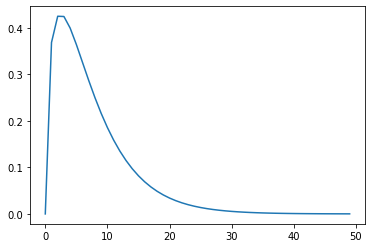

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.sqrt(y) / np.exp(y) for y in np.linspace(0, 10)])
plt.show()

Problem $(1)$ can be solved easily using the following code:

In [ ]:
x = cp.Variable()
problem = cp.Problem(cp.Maximize(cp.sqrt(x) / cp.exp(x)))
problem.solve(qcp=True)

0.4288819424791909

Note that in the code above we simply declared the objective function as we would normally do for a convex problem and we solved it with the command `problem.solve(qcp=True)`. This command is important because it tells CVXPY to use the quasiconvex solver.

For the sake of clarity, note that this problem can be solved using bisection (like you did before) on a feasibility problem, but for more general problems (like the ones in the exercises below) CVXPY does not recognize that the feasibility problem is convex and you must use the quasiconvex solver.

In [ ]:
# Tolerance, upper and lower bound for the bisection
u = 0
l = -10
tol = 0.0001

# Bisection algorithm
while u-l >= tol:
  gamma = (l+u)/2
  # Formulation and soluton of the feasibility problem
  constr = [-cp.sqrt(x)<=gamma*cp.exp(x),x>=0]
  prob = cp.Problem(cp.Minimize(0),constr)
  prob.solve()

  if prob.status == 'optimal':
    u=gamma
    x_opt=x.value
    objval_opt=gamma
  else:
    l=gamma

print(-objval_opt)

NameError: ignored

# Exercise 1 - Quasiconvex Optimisation

Consider the problem of minimising the ratio of the Eucliden distance from $a$ over the Eucliden distance from $b$, namely

$$
\min \quad \frac{||x-a||_2}{||x-b||_2}
$$

This is a quasiconvex optimisation problem. 

*   Solve it with the data given below. Note that you need to use the [quasiconvex atom](https://www.cvxpy.org/tutorial/dqcp/index.html?highlight=dist_ratio#dqcp-atoms) `cvxpy.dist_ratio(x, a, b)` which denotes the function $\frac{||x-a||_2}{||x-b||_2}$.
*   Print the optimal ratio. 
*   Print the optimal $x$.

In [ ]:
# Data
n = 10
np.random.seed(1)
a = np.random.randn(n)
b = np.random.randn(n)

# Exercise 2

Consider the problem of finding the *minimum-length* least squares approximation of a vector $b$. The length of a vector in $\mathbb{R}^n$ is defined as the largest index corresponding to a nonzero component:

$$
\text{len}(x) = \max\{i : x_i \ne 0\}.
$$

This function is quasiconvex on $\mathbb{R}^n$ because its sublevel sets are subspaces and it is implemented in CVXPY by the atom `cvxpy.length(x)`. The problem can be formulated as

$$
\begin{array}{ll}
\displaystyle \min_{x} &  \text{len} (x) \\ 
\text{s.t. } & \frac{1}{n}||Ax-b||_2^2 \le \varepsilon.
\end{array}
$$

where $\frac{1}{n}||Ax-b||_2^2$ is the Mean-Square Error (MSE). 

The data of the problem is


In [ ]:
# Data
n = 10
np.random.seed(1)
A = np.random.randn(n, n)
b = A @ np.random.randn(n)
epsilon = 1e-2



*   Solve the problem
*   Print the optimal MSE
*   Print the optimal $x$ rounded to two decimal digits



In [ ]:
x = cp.Variable((n))


constraints = [1/n *cp.sum_squares(A @ x - b) <= epsilon ]

obj = cp.Minimize(cp.length(x))

prob = cp.Problem(obj,constraints)
prob.solve(qcp=True)



10.0

In [ ]:
mse = 1/n * np.sum((A@x.value -b)**2)
mse

0.009260093288136621

In [ ]:
x.value

array([-2.58366030e-01,  1.38434327e+00,  2.10714108e-01,  9.44811159e-01,
       -1.14622208e+00,  1.51283929e-01,  6.62931941e-01, -1.16358584e+00,
        2.78132907e-13, -1.76314786e-13])

In [ ]:
print("X values rounded:")
np.around(x.value,decimals=2)

X values rounded:


array([-0.26,  1.38,  0.21,  0.94, -1.15,  0.15,  0.66, -1.16,  0.  ,
       -0.  ])

Note: The x values in the indexes 9 and 10 are almost 0 but not quite, hence the prob.solve returns 10, but the answer should be 8 if you consider these last two elements as zero